In [1]:
# Starbucks - Stock market abbreviation: SBUX
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='your_API_key_here',output_format='pandas')

In [2]:
# Use the Alpha Vantage API to get Starbucks stock data
SBUX_data, metadata=ts.get_daily('SBUX',outputsize='full')
SBUX_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5227.000000,5227.000000,5227.000000,5227.000000,5.227000e+03
mean,44.630369,45.128181,44.126043,44.644481,7.350179e+06
std,20.865832,20.966816,20.746374,20.859243,5.375476e+06
min,7.480000,7.900000,7.060000,7.170000,5.191000e+05
25%,26.197500,26.655000,25.980000,26.255000,3.713850e+06
50%,43.220000,43.890000,42.650000,43.250000,6.215707e+06
75%,57.670000,58.210000,57.260000,57.765000,9.308950e+06
max,98.490000,99.720000,97.210000,99.110000,7.600390e+07


In [3]:
# Create a csv file of the data
SBUX_data.to_csv('SBUX_data.csv')

In [4]:
# Sort by date
SBUX_data['date'] = SBUX_data.index

In [5]:
# Show our data
SBUX_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-10,75.8182,77.665,75.8100,77.47,6601446.0,2020-08-10
2020-08-07,75.4800,75.930,75.2100,75.79,6569313.0,2020-08-07
2020-08-06,75.2000,75.920,74.9412,75.66,6764846.0,2020-08-06
2020-08-05,75.3500,75.990,75.3250,75.78,7823144.0,2020-08-05
2020-08-04,75.3700,75.485,74.7600,75.13,12792449.0,2020-08-04
...,...,...,...,...,...,...
1999-11-05,28.0600,29.380,28.0000,28.75,5720700.0,1999-11-05
1999-11-04,26.6900,27.000,25.8800,26.56,2784900.0,1999-11-04
1999-11-03,27.2500,27.440,26.2500,26.63,2769800.0,1999-11-03


In [6]:
# Read in our stock market data to use for training
SBUX_training_complete = pd.read_csv('/Users/kelbywilson/Desktop/project_3/SBUX_data.csv')

In [7]:
# Filter all the data from our training set and will retain only the values for the open column
# We will use the opening stock price for our testing
SBUX_training_processed = SBUX_training_complete.iloc[:, 1:2].values

In [8]:
# Scale the data so we can use a recurrent neural network on it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

SBUX_training_scaled = scaler.fit_transform(SBUX_training_processed)

In [9]:
# Create two lists: feature_set and labels
features_set = []
labels = []
for i in range(60, 5227):
    features_set.append(SBUX_training_scaled[i-60:i, 0])
    labels.append(SBUX_training_scaled[i, 0])

In [10]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [11]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [12]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Instantiate the sequential class
model = Sequential()

In [14]:
# Add LSTM layer to the model that we just created. LSTM = Long Short-Term Memory, a type of RNN
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [16]:
# Add three more LSTM and dropout layers to our model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [17]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [18]:
# Compile the model and set parameters
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Train the model - this can take a while
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5166 samples
Epoch 1/100
5166/5166 [==============================] - 27s 5ms/sample - loss: 0.0104
Epoch 2/100
5166/5166 [==============================] - 26s 5ms/sample - loss: 0.0033
Epoch 3/100
5166/5166 [==============================] - 26s 5ms/sample - loss: 0.0029
Epoch 4/100
5166/5166 [==============================] - 25s 5ms/sample - loss: 0.0026
Epoch 5/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0022
Epoch 6/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0021
Epoch 7/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0019
Epoch 8/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0020
Epoch 9/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0017
Epoch 10/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 0.0017
Epoch 11/100


5166/5166 [==============================] - 23s 5ms/sample - loss: 6.3576e-04
Epoch 88/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.0340e-04
Epoch 89/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 5.6985e-04
Epoch 90/100
5166/5166 [==============================] - 23s 5ms/sample - loss: 6.1661e-04
Epoch 91/100
5166/5166 [==============================] - 23s 5ms/sample - loss: 5.7775e-04
Epoch 92/100
5166/5166 [==============================] - 23s 5ms/sample - loss: 6.2237e-04
Epoch 93/100
5166/5166 [==============================] - 23s 5ms/sample - loss: 5.8891e-04
Epoch 94/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.1904e-04
Epoch 95/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 5.7786e-04
Epoch 96/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 6.4010e-04
Epoch 97/100
5166/5166 [==============================] - 24s 5ms/sample - loss: 5.8466e-04
E

In [20]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
SBUX_data2, metadata=ts.get_daily('SBUX',outputsize='compact')
SBUX_data2.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,74.199533,75.238650,72.879166,74.159000,1.180347e+07
std,4.742181,4.213833,5.188665,4.684956,5.258673e+06
min,56.230000,57.440000,53.550000,56.550000,5.673370e+06
25%,73.355000,74.192500,71.902500,73.350000,8.057400e+06
50%,75.085000,75.960000,74.120000,75.340000,1.030665e+07
75%,76.837500,77.666250,75.770000,76.995000,1.307212e+07
max,83.080000,83.620000,82.180000,83.560000,2.842060e+07


In [21]:
SBUX_data2.to_csv('SBUX_data2.csv')

In [22]:
SBUX_data2['date'] = SBUX_data2.index

In [23]:
SBUX_data2

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-10,75.8182,77.665,75.8100,77.47,6602745.0,2020-08-10
2020-08-07,75.4800,75.930,75.2100,75.79,6569313.0,2020-08-07
2020-08-06,75.2000,75.920,74.9412,75.66,6764846.0,2020-08-06
2020-08-05,75.3500,75.990,75.3250,75.78,7823144.0,2020-08-05
2020-08-04,75.3700,75.485,74.7600,75.13,12792449.0,2020-08-04
...,...,...,...,...,...,...
2020-03-25,66.8300,69.640,63.4900,65.81,22977200.0,2020-03-25
2020-03-24,62.6100,65.160,61.0000,64.88,28286200.0,2020-03-24
2020-03-23,57.2300,57.440,54.0000,56.55,24905800.0,2020-03-23


In [24]:
# Read in our testing data
SBUX_testing_complete = pd.read_csv('/Users/kelbywilson/Desktop/project_3/SBUX_data2.csv')
SBUX_testing_processed = SBUX_testing_complete.iloc[:, 1:2].values

In [25]:
# Concatenate our training data and testing data
SBUX_total = pd.concat((SBUX_training_complete['1. open'],SBUX_testing_complete['1. open']), axis=0)

In [26]:
# Prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days
# We need opening stock prices for the 20 test days and the 60 stock prices from the last 60 days for the training set
test_inputs = SBUX_total[len(SBUX_total) - len(SBUX_testing_complete) - 60:].values

In [27]:
# Scale the test data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [40]:
# Prepare our final test input set that will contain previous 60 stock prices
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [41]:
# Convert our data into the three-dimensional format which can be used as input to the LSTM
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [42]:
# Call the predict method on the model that we trained
predictions = model.predict(test_features)

In [43]:
# Since we scaled our data, the predictions made by the LSTM are also scaled 
# We need to reverse the scaled prediction back to their actual values
predictions = scaler.inverse_transform(predictions)

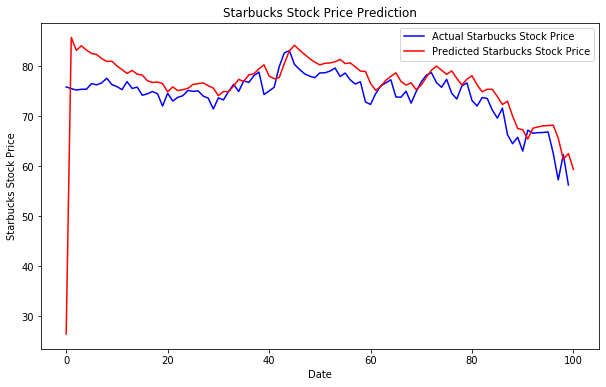

In [44]:
# Plot the results - model trained with 100 epochs 
plt.figure(figsize=(10,6))
plt.plot(SBUX_testing_processed, color='blue', label='Actual Starbucks Stock Price')
plt.plot(predictions , color='red', label='Predicted Starbucks Stock Price')
plt.title('Starbucks Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Starbucks Stock Price')
plt.legend()
plt.show()

In [45]:
# Save the model - can be used later
model.save("Starbucks_model_trained.h5")